In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import pandas_datareader.data as web
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# Determine the data path.
Data_path = "C:\\Users\\Beena Tiwari\\Downloads\\MVA_Vehicle_Sales_Counts_by_Month_for_Calendar_Year_2002_through_December_2023.csv" 
# Load the dataset
data = pd.read_csv(Data_path)
data

,Year,Month,New,Used,Total Sales New,Total Sales Used
0,2002,JAN,31106,49927,755015820,386481929
1,2002,FEB,27520,50982,664454223,361353242
2,2002,MAR,34225,58794,805666244,419385387
3,2002,APR,36452,59817,846368297,433061150
4,2002,MAY,37359,60577,855005784,442569410
...,...,...,...,...,...,...
259,2023,AUG,25876,52725,1222581892,908454060
260,2023,SEP,23892,45386,1134437699,744676584
261,2023,OCT,23775,45473,1122680147,740582533
262,2023,NOV,22720,42260,1062465105,694190564


In [3]:
data.dropna(inplace=True) #Dropping rows with missing values

In [4]:
cleaned_columns = [col.strip() for col in data.columns]
data.columns = cleaned_columns 

In [5]:
#Merge "Month" and "Year" into a single datetime column called "date"
data['Date'] = pd.to_datetime(data['Year'].astype(str) + data['Month'], format='%Y%b')
data

,Year,Month,New,Used,Total Sales New,Total Sales Used,Date
0,2002,JAN,31106,49927,755015820,386481929,2002-01-01
1,2002,FEB,27520,50982,664454223,361353242,2002-02-01
2,2002,MAR,34225,58794,805666244,419385387,2002-03-01
3,2002,APR,36452,59817,846368297,433061150,2002-04-01
4,2002,MAY,37359,60577,855005784,442569410,2002-05-01
...,...,...,...,...,...,...,...
259,2023,AUG,25876,52725,1222581892,908454060,2023-08-01
260,2023,SEP,23892,45386,1134437699,744676584,2023-09-01
261,2023,OCT,23775,45473,1122680147,740582533,2023-10-01
262,2023,NOV,22720,42260,1062465105,694190564,2023-11-01


In [6]:
#checking for missing values 
missing_data = {}
for col in data.columns:
    missing_data[col] = data[col].isnull().sum()

print("Missing data:", missing_data)

Missing data: {'Year': 0, 'Month': 0, 'New': 0, 'Used': 0, 'Total Sales New': 0, 'Total Sales Used': 0, 'Date': 0}


In [7]:
#removing the initial "month" and "year" columns
data.drop(['Year', 'Month'], axis=1, inplace=True)

In [9]:
start_date = '2002-01-01'
end_date = '2023-12-31'
unemployment_rate = web.DataReader('UNRATE', 'fred', start=start_date, end=end_date)

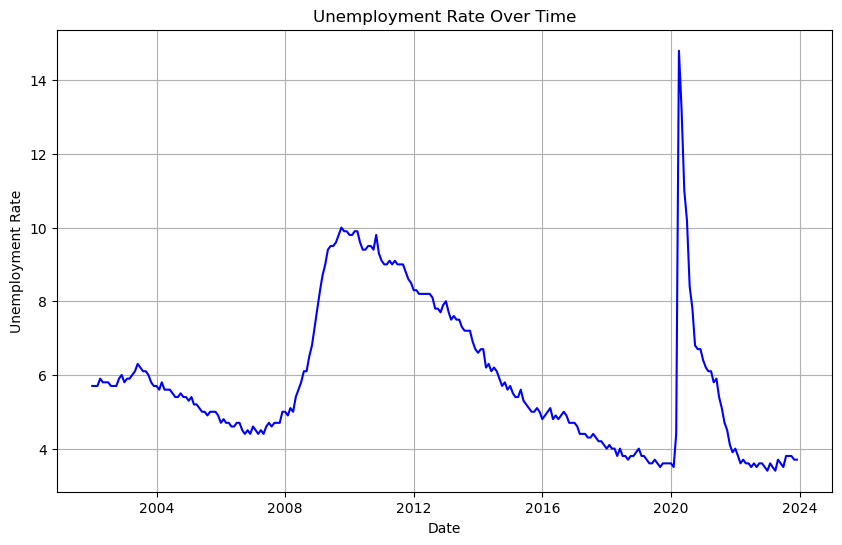

In [12]:
# Data Acquisition (using pandas_datareader as an example)
start_date = '2002-01-01'
end_date = '2023-12-31'
unemployment_rate = web.DataReader('UNRATE', 'fred', start=start_date, end=end_date)

# Based on the date, combine economic data with the current dataset.
data_merged = pd.merge(data, unemployment_rate, how='left', left_on='Date', right_index=True)

# Data Visualization 
plt.figure(figsize=(10, 6))
plt.plot(data_merged['Date'], data_merged['UNRATE'], color='blue')
plt.title('Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.grid(True)
plt.show()

In [14]:
# Split data into train and test sets
train, test = train_test_split(data_merged, test_size=0.2, shuffle=False)

# Define a function to fit ARIMA model, make predictions, and evaluate performance
def fit_arima_and_evaluate(train, test, column):
    # Fit ARIMA model
model = ARIMA(train[column], order=(1, 1, 1))
fit_model = model.fit()
# Make future predictions
forecast = fit_model.predict(start=len(train), end=len(train)+len(test)-1, typ='levels')

# Evaluate the performance of the forecasting model
mae = mean_absolute_error(test[column], forecast)
mse = mean_squared_error(test[column], forecast)
# Plot predictions vs actual
plt.figure(figsize=(10, 6))
plt.plot(test['Date'], test[column], label='Actual', color='blue')
plt.plot(test['Date'], forecast, label='ARIMA Forecast', linestyle='--', color='red')
plt.title(f'ARIMA Forecast vs Actual for {column}')
plt.xlabel('Date')
plt.ylabel('Sales Count')
plt.legend()
plt.grid(True)
plt.show()
    
    return mae, mse

In [16]:
# Establish a function to fit the SARIMA model, provide forecasts, and assess results
def fit_sarima_and_evaluate(train, test, column):
    
model = SARIMAX(train[column], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
fit_model = model.fit()

forecast = fit_model.predict(start=len(train), end=len(train)+len(test)-1, typ='levels')

# Assess how well the forecasting model performs.
mae = mean_absolute_error(test[column], forecast)
mse = mean_squared_error(test[column], forecast)

# Plot predictions vs actual
plt.figure(figsize=(10, 6))
plt.plot(test['Date'], test[column], label='Actual', color='blue')
plt.plot(test['Date'], forecast, label='SARIMA Forecast', linestyle='--', color='green')
plt.title(f'SARIMA Forecast vs Actual for {column}')
plt.xlabel('Date')
plt.ylabel('Sales Count')
plt.legend()
plt.grid(True)
plt.show()
    
return mae, mse

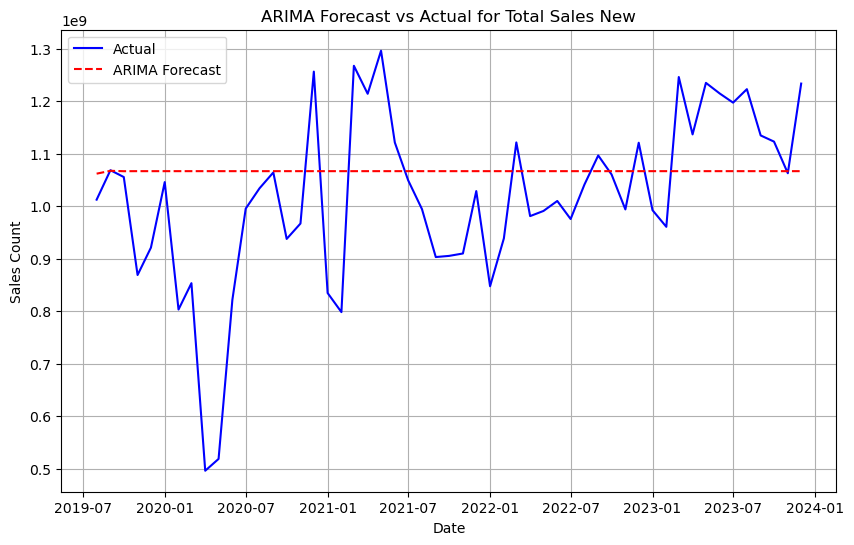

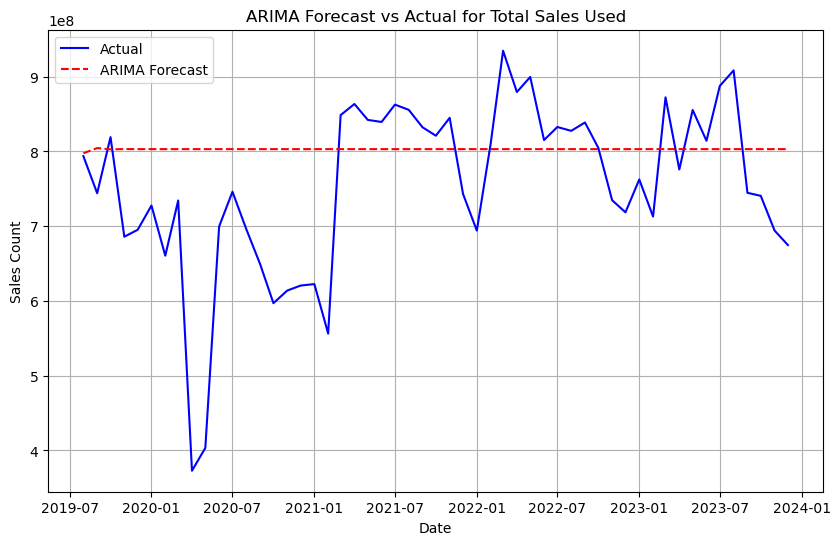

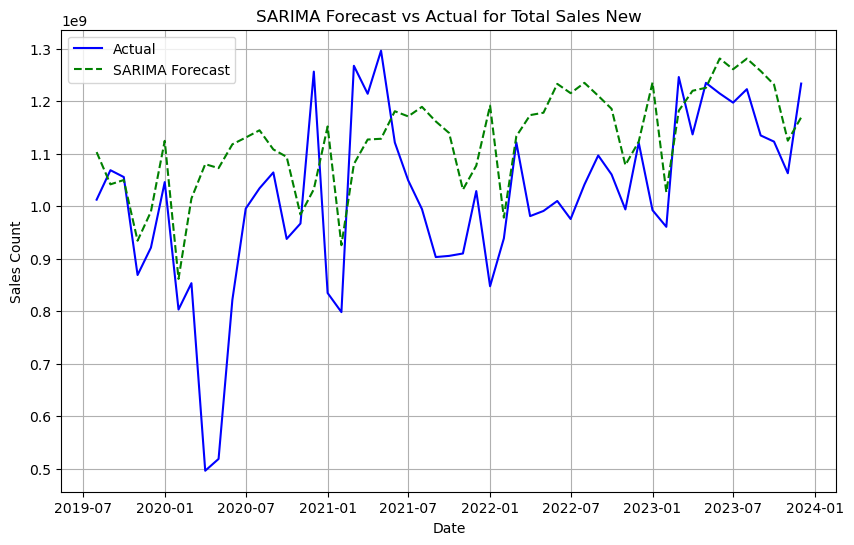

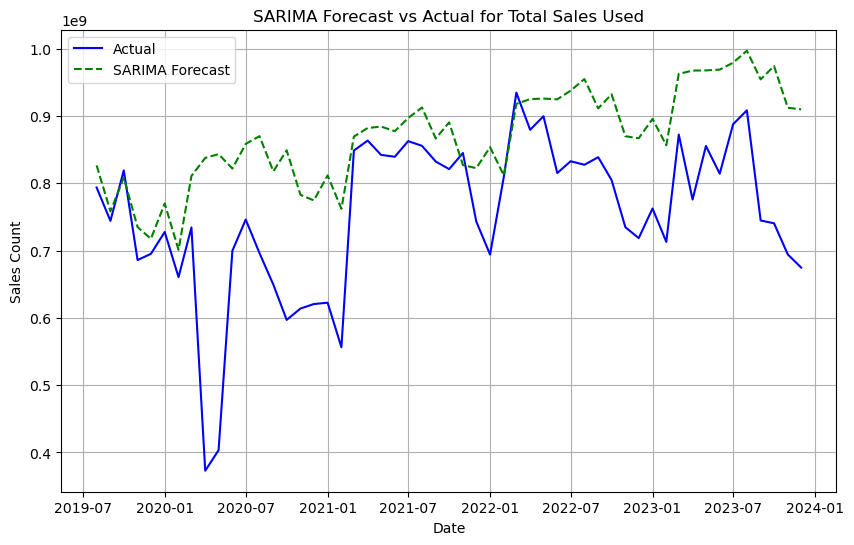

ARIMA Model Metrics:
 - New Sales Count:
   - Mean Absolute Error (ARIMA): 127582997.48824152
   - Mean Squared Error (ARIMA): 2.9134358875768996e+16
 - Used Sales Count:
   - Mean Absolute Error (ARIMA): 90717271.1036761
   - Mean Squared Error (ARIMA): 1.5321793173685612e+16

SARIMA Model Metrics:
 - New Sales Count:
   - Mean Absolute Error (SARIMA): 139080888.2573192
   - Mean Squared Error (SARIMA): 3.3456278157024956e+16
 - Used Sales Count:
   - Mean Absolute Error (SARIMA): 115671033.08196023
   - Mean Squared Error (SARIMA): 2.24821414093096e+16


In [19]:
# Fit SARIMA and ARIMA models (e.g., "Total Sales Used," "Total Sales New") for each column.
mae_new_arima, mse_new_arima = fit_arima_and_evaluate(train, test, 'Total Sales New')
mae_used_arima, mse_used_arima = fit_arima_and_evaluate(train, test, 'Total Sales Used')

mae_new_sarima, mse_new_sarima = fit_sarima_and_evaluate(train, test, 'Total Sales New')
mae_used_sarima, mse_used_sarima = fit_sarima_and_evaluate(train, test, 'Total Sales Used')

# Print metrics for SARIMA and ARIMA model assessment
print("ARIMA Model Metrics:")
print(" - New Sales Count:")
print("   - Mean Absolute Error (ARIMA):", mae_new_arima)
print("   - Mean Squared Error (ARIMA):", mse_new_arima)
print(" - Used Sales Count:")
print("   - Mean Absolute Error (ARIMA):", mae_used_arima)
print("   - Mean Squared Error (ARIMA):", mse_used_arima)

print("\nSARIMA Model Metrics:")
print(" - New Sales Count:")
print("   - Mean Absolute Error (SARIMA):", mae_new_sarima)
print("   - Mean Squared Error (SARIMA):", mse_new_sarima)
print(" - Used Sales Count:")
print("   - Mean Absolute Error (SARIMA):", mae_used_sarima)
print("   - Mean Squared Error (SARIMA):", mse_used_sarima)